<a href="https://colab.research.google.com/github/piretprnik/T30/blob/main/10_08correlation%2C_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
pokemon_df= pd.read_csv('/content/Pokemon.csv')# paneb selle juba DataFrame-i
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


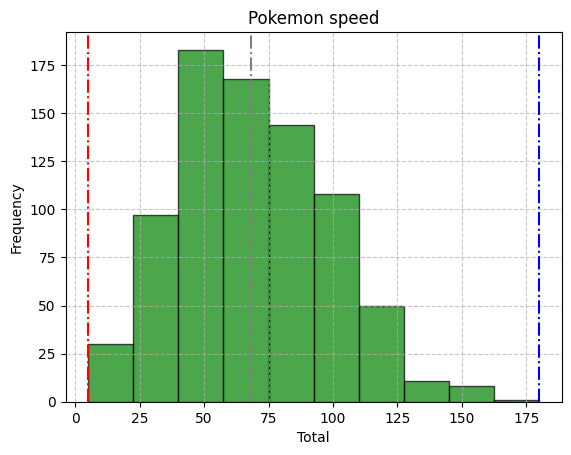

In [6]:
### Create a histogram of column speed
plt.hist(pokemon_df['Speed'], color = 'green', edgecolor = 'black', alpha = 0.7)# alpha = transparency(läbipaistvus), default = 10bins
plt.title('Pokemon speed')
plt.xlabel('Total')
plt.ylabel('Frequency')

### Add to your histogram min, max , mean(average) lines

#avg. line
plt.axvline(pokemon_df['Speed'].mean(), color = 'grey', linestyle = 'dashdot')
#axvline(x means xaxis, v means vertical)- matplotlib library function means draw a line in x axis vertically. new the line should be pokemon_df['Speed'].mean() vastava värvi ja kujuga
# min. line
plt.axvline(pokemon_df['Speed'].min(), color = 'red', linestyle = 'dashdot')

#max.line
plt.axvline(pokemon_df['Speed'].max(), color = 'blue', linestyle = 'dashdot')

plt.grid(linestyle = '--', alpha = 0.7)

# CORRELATION

Text(0, 0.5, 'Defense')

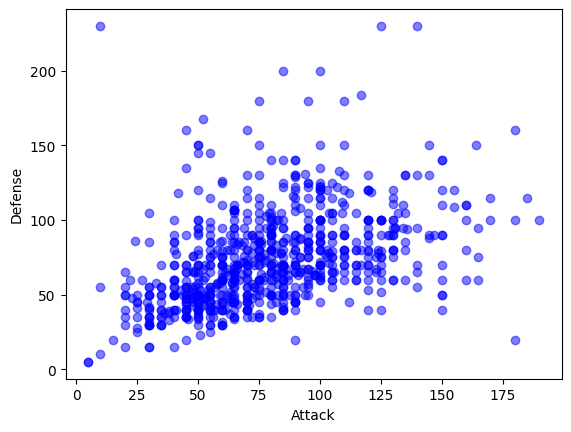

In [10]:

# SCATTER PLOT(punkt diagramm) between variables: Attack and Defence
                       # X                       YAxis
plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color= 'blue', alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')


Text(0.5, 1.0, 'Pokemon speed and defense scatterplot')

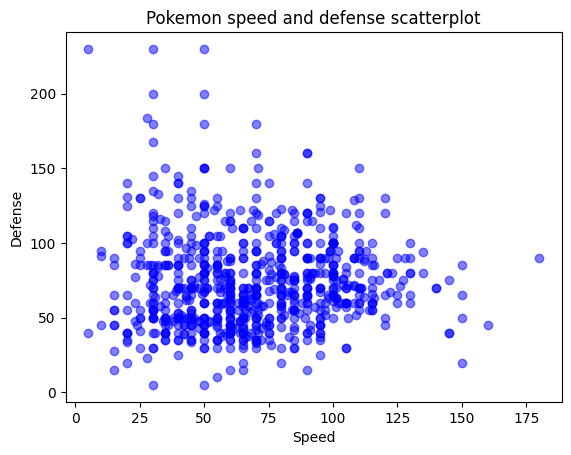

In [14]:
# scatterplot for variables: Speed and Defence
plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color= 'blue', alpha=0.5)
plt.xlabel('Speed')
plt.ylabel('Defense')
plt.title('Pokemon speed and defense scatterplot')

Text(0.5, 1.0, 'Pokemon speed and defense scatterplot')

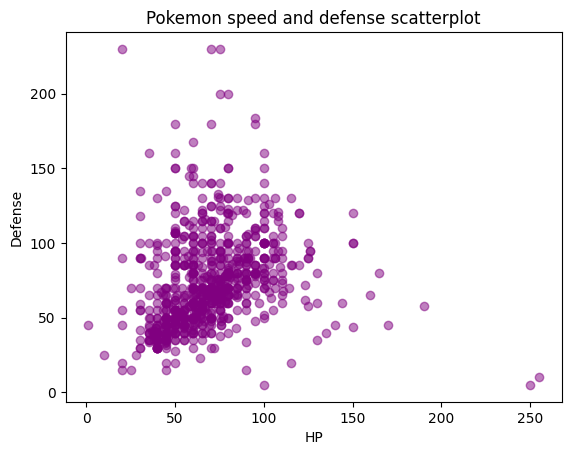

In [21]:
#scatterplot for variables: HP and Defence
plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color='purple', alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('Pokemon speed and defense scatterplot')

## Pearson correlation

The correlation coefficient indicates the strength and direction of the statistical relationship between two variables. The coefficient ranges from -1 to 1, with a value of 0.43 signifying a positive but moderately strong relationship between the two variables.

A positive correlation coefficient means that the variables increase together. Therefore, as one variable increases, the other also tends to increase, and vice versa.
The closer the correlation coefficient is to 1, the stronger the positive relationship.
A correlation coefficient of 0.43 is not very high, but it indicates a moderately positive relationship.
If the correlation coefficient were negative, it would suggest that as one variable increases, the other variable decreases.
A correlation coefficient of -1 indicates a perfect negative relationship.
Thus, a correlation coefficient of 0.43 might suggest that, for example, as Pokémon's Attack values increase, their Defense values tend to increase as well, but the relationship is not very strong.

In [ ]:
# Result of this correlation calculation is between -1 and 1.
# -1 perfect negative relationship
# 1 perfect positive relationship

In [22]:
# Pearson correlation between Attack/Defence

correlation1= pokemon_df['Attack'].corr(pokemon_df['Defense'])
print(correlation1)

0.4386870551184892


In [23]:
# Pearson correlation between Speed/Defence

correlation2= pokemon_df['Speed'].corr(pokemon_df['Defense'])
print(correlation2)

0.015226598088597448


In [25]:
# Select only numeric columns
numeric_columns= pokemon_df.select_dtypes(include=['number'])
numeric_columns= numeric_columns.drop(columns=['#'])
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [29]:
numeric_columns= pokemon_df.select_dtypes(include=['number'])
numeric_columns= numeric_columns.drop(columns=['#'])
numeric_columns
target_column = 'Attack'
correlation_result= {} # key = column, val= pearson_correlation

# for loop comparing target column and all other columns in the DataFrame
for column in numeric_columns.columns:
  if column == target_column: # target_columni asemel õib olla siin  ka 'Attack'
    continue
  correlation= pokemon_df[target_column].corr(pokemon_df[column])
  correlation_result[column]= correlation

print(correlation_result)

{'Total': 0.7362106519949293, 'HP': 0.422386028776223, 'Defense': 0.4386870551184892, 'Sp. Atk': 0.396361755349232, 'Sp. Def': 0.26398955110108846, 'Speed': 0.38123973924108967, 'Generation': 0.051451336708469686}


In [30]:
# õpetaja versioon

numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns
target_column = 'Attack'
correlation_results = {} #key = column, val=pearson_correlation

# for loop comparing target column and all other columns in the DataFrame

for col in numeric_columns.columns:
  if col =='Attack':
    continue
  correlation = pokemon_df[target_column].corr(pokemon_df[col])
  correlation_results[col] = correlation

correlation_results

{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.396361755349232,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

## correlation matrix

In [31]:
correlation_matrix= numeric_columns.corr() # all columns are numeric
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


## Visualizing with seaborn

In [32]:
import seaborn as sns


<Axes: >

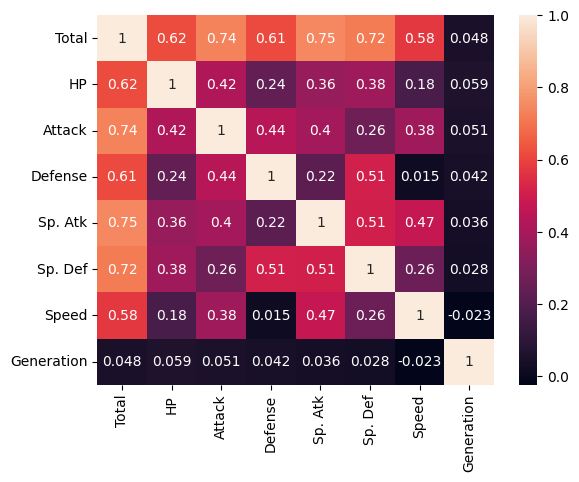

In [38]:
# seabor heatmap

sns.heatmap(correlation_matrix, annot=True) ## annotation- adding values


Text(0.5, 1.0, 'Correlation matrix')

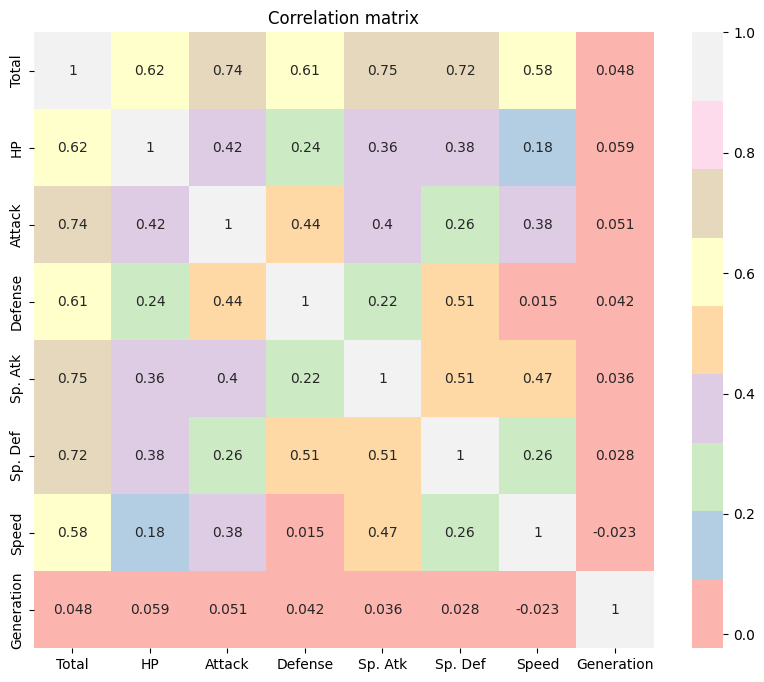

In [41]:
plt.figure(figsize= (10, 8)) # increasing size for visualization
sns.heatmap(correlation_matrix, annot=True,cmap= 'Pastel1') ## annotation- adding values
plt.title('Correlation matrix')

# Linear regression (predict one value based on another)

<Axes: xlabel='Attack', ylabel='Defense'>

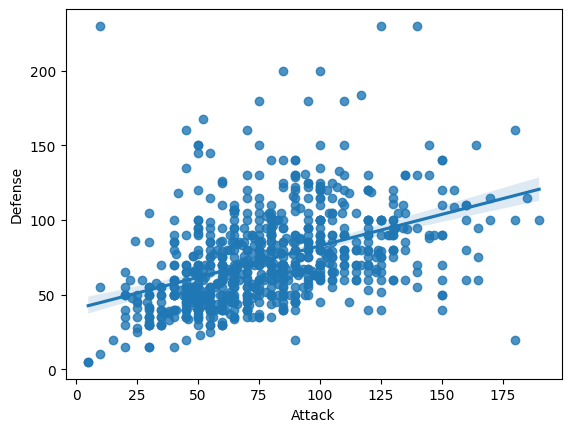

In [42]:
sns.regplot(x = 'Attack', y='Defense', data= pokemon_df)


Pearson correlation coefficient: 0.015226598088597448


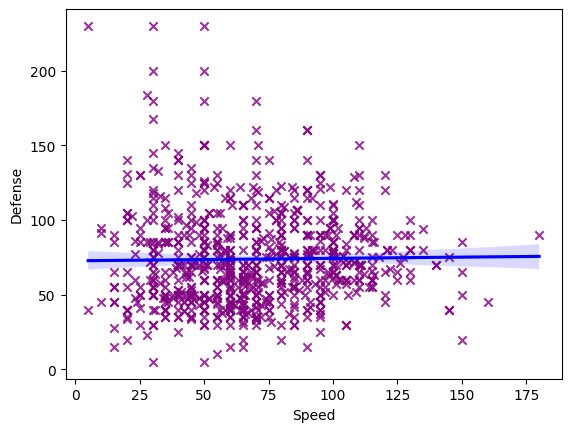

In [48]:
sns.regplot(
    data=pokemon_df, x='Speed', y="Defense",
   marker="x", color="purple", line_kws={'color':"blue"},
)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)

## Teamwork

Task: Visualizing the correlation of Attack and Defense variables of two Types: Grass and Water Type 1 Pokémon.
1. Create two DataFrame Grass and Water
2. Create the regression plots for each (Grass and Water)
3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense)
4. Explain to each other what do you see and what it means.

       #                     Name Type 1 Type 2  Total  HP  Attack  Defense  \
9      7                 Squirtle  Water    NaN    314  44      48       65   
10     8                Wartortle  Water    NaN    405  59      63       80   
11     9                Blastoise  Water    NaN    530  79      83      100   
12     9  BlastoiseMega Blastoise  Water    NaN    630  79     103      120   
59    54                  Psyduck  Water    NaN    320  50      52       48   
..   ...                      ...    ...    ...    ...  ..     ...      ...   
724  656                  Froakie  Water    NaN    314  41      56       40   
725  657                Frogadier  Water    NaN    405  54      63       52   
726  658                 Greninja  Water   Dark    530  72      95       67   
762  692                Clauncher  Water    NaN    330  50      53       62   
763  693                Clawitzer  Water    NaN    500  71      73       88   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary

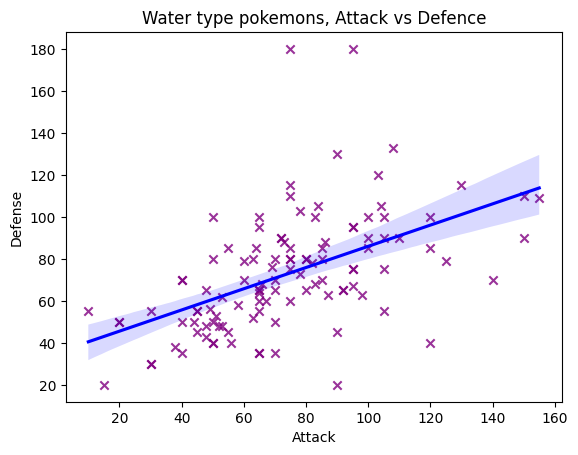

In [54]:
water_pokemon= pokemon_df[pokemon_df['Type 1'] == 'Water']
print(water_pokemon)

sns.regplot(
    data=water_pokemon, x='Attack', y="Defense",
   marker="x", color="purple", line_kws={'color':"blue"},
)
plt.title('Water type pokemons, Attack vs Defence')
plt.xlabel('Attack')
plt.ylabel('Defense')

correlation3 = water_pokemon['Attack'].corr(water_pokemon['Defense'])
print('Pearson correlation coefficient:', correlation3)

       #                   Name Type 1    Type 2  Total   HP  Attack  Defense  \
0      1              Bulbasaur  Grass    Poison    318   45      49       49   
1      2                Ivysaur  Grass    Poison    405   60      62       63   
2      3               Venusaur  Grass    Poison    525   80      82       83   
3      3  VenusaurMega Venusaur  Grass    Poison    625   80     100      123   
48    43                 Oddish  Grass    Poison    320   45      50       55   
..   ...                    ...    ...       ...    ...  ...     ...      ...   
718  650                Chespin  Grass       NaN    313   56      61       65   
719  651              Quilladin  Grass       NaN    405   61      78       95   
720  652             Chesnaught  Grass  Fighting    530   88     107      122   
740  672                 Skiddo  Grass       NaN    350   66      65       48   
741  673                 Gogoat  Grass       NaN    531  123     100       62   

     Sp. Atk  Sp. Def  Spee

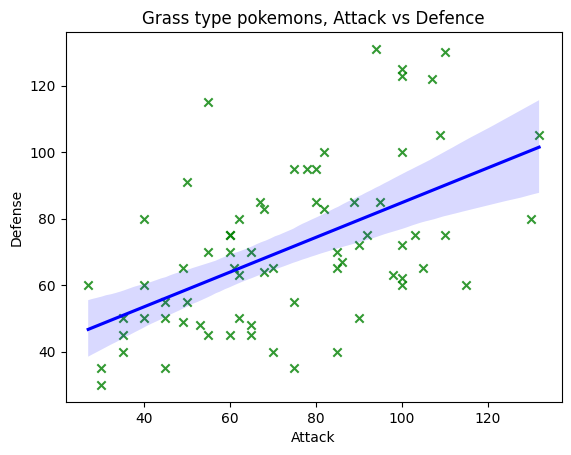

In [55]:
grass_pokemon= pokemon_df[pokemon_df['Type 1'] == 'Grass']
print(grass_pokemon)
sns.regplot(
    data=grass_pokemon, x='Attack', y="Defense",
   marker="x", color="green", line_kws={'color':"blue"},
)
plt.title('Grass type pokemons, Attack vs Defence')
plt.xlabel('Attack')
plt.ylabel('Defense')

correlation4 = grass_pokemon['Attack'].corr(grass_pokemon['Defense'])
print('Pearson correlation coefficient:', correlation4)